In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import (
    AdaBoostClassifier,
    GradientBoostingClassifier,
    RandomForestClassifier,
)
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score 
from sklearn.metrics import roc_curve, roc_auc_score



In [2]:
df = pd.read_csv("data/merged_data_636.csv")

In [3]:
df.head()

,HR,P,PR,QRS,QT,QTc,P_Axis,QRS_Axis,T_Axis,RV5,SV1,target
0,105,86,117,88,345,456,45,18,16,1.533,0.952,1
1,51,101,157,83,414,385,-6,35,63,1.485,0.593,1
2,160,0,0,119,270,440,0,-39,-28,0.103,0.186,1
3,67,110,144,94,401,426,70,57,79,0.254,1.164,1
4,63,87,134,84,423,434,18,59,44,1.511,0.293,0


In [4]:
X = df.drop("target" , axis=1)
y = df['target']

In [5]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20 ,random_state=42)

In [6]:
scaler = StandardScaler()
scaler.fit_transform(X_train)
scaler.transform(X_test)

array([[ 2.01866121e+00, -4.36747967e+00, -3.78230373e+00, ...,
         2.74661029e+00,  5.91480470e+00,  4.61370949e+00],
       [-3.12532617e-01,  3.19716051e-01,  3.86162493e-01, ...,
        -2.33979664e-01,  4.06253301e+00,  2.68453401e-01],
       [ 1.40518915e+00, -7.82533976e-02, -2.95950161e-01, ...,
         4.26008112e-01, -1.64851676e+00,  3.48296816e-01],
       ...,
       [-1.04869909e+00,  1.29253026e+00,  1.04301172e+00, ...,
         1.91818901e-01, -1.20720003e-01, -5.51272329e-01],
       [-6.71437924e-02, -2.99347536e-01, -7.75955362e-01, ...,
         3.40848399e-01, -3.22971193e-01,  7.95419941e-01],
       [-5.79658640e-03,  5.44030851e-02, -1.94896434e-01, ...,
         2.49113115e+00,  3.20842188e+00,  1.37916402e+00]],
      shape=(128, 11))

In [7]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, class_weight='balanced'),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=19),
    "Random Forest": RandomForestClassifier(
        random_state=42,
        class_weight='balanced',
        n_estimators=500,
        max_depth=8,
        min_samples_split=2,
        min_samples_leaf=1,
        max_features='sqrt'
    ),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(
        n_estimators=500,
        learning_rate=0.05,
        max_depth=4,
        random_state=42
    ),
    "AdaBoost": AdaBoostClassifier(
        n_estimators=500,
        learning_rate=0.05,
        random_state=42
    )
}

In [ ]:
import time
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

results = []

for name, model in models.items():
    start = time.time()                   

    model.fit(X_train, y_train)              
    y_pred = model.predict(X_test)           

    end = time.time()                        
    time_taken = end - start                 

    results.append({
        "Model": name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred, zero_division=0),
        "Recall": recall_score(y_test, y_pred, zero_division=0),
        "F1 Score": f1_score(y_test, y_pred, zero_division=0),
        "Time (sec)": round(time_taken, 4)   # Rounded to 4 decimal places
    })

# Convert to DataFrame
results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by="F1 Score", ascending=False).reset_index(drop=True)
print(results_df)


d:\data_Science\HeartAttackDetection\venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [06:37:22] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


                 Model  Accuracy  Precision    Recall  F1 Score  Time (sec)
0              XGBoost  0.945312   0.973451  0.964912  0.969163      0.0376
1    Gradient Boosting  0.929688   0.972973  0.947368  0.960000      1.6292
2             AdaBoost  0.890625   0.890625  1.000000  0.942149      1.0767
3        Random Forest  0.875000   0.990000  0.868421  0.925234      0.7260
4  K-Nearest Neighbors  0.843750   0.898305  0.929825  0.913793      0.0042
5  Logistic Regression  0.617188   0.922078  0.622807  0.743455      0.0783


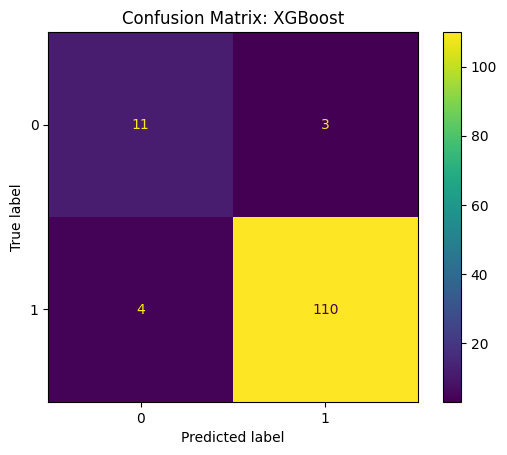

In [9]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

best_model = models[results_df.loc[0, "Model"]]
y_pred = best_model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title(f"Confusion Matrix: {results_df.loc[0, 'Model']}")
plt.show()

In [18]:
xgb_clf = XGBClassifier(
    objective="binary:logistic",
    eval_metric="logloss",
    use_label_encoder=False,
    random_state=42,
    n_jobs=-1
)

In [19]:
param_dist = {
    "n_estimators": [100, 200, 300, 400],
    "max_depth": [3, 5, 7, 9],
    "learning_rate": [0.01, 0.05, 0.1, 0.2],
    "subsample": [0.6, 0.8, 1.0],
    "colsample_bytree": [0.6, 0.8, 1.0],
    "gamma": [0, 0.1, 0.2, 0.3],
    "reg_lambda": [1, 1.5, 2.0]
}

In [20]:
random_search = RandomizedSearchCV(
    estimator=xgb_clf,
    param_distributions=param_dist,
    n_iter=20,              
    scoring="f1",           
    cv=3,                   
    verbose=2,
    random_state=42,
    n_jobs=-1
)

In [21]:
random_search.fit(X_train, y_train)

print("Best Parameters:", random_search.best_params_)
print("Best F1 Score:", random_search.best_score_)

# Evaluate on test set
best_xgb = random_search.best_estimator_
y_pred = best_xgb.predict(X_test)

print("\nTest Set Performance:")
print("Accuracy :", accuracy_score(y_test, y_pred))
print("F1-score :", f1_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall   :", recall_score(y_test, y_pred))

Fitting 3 folds for each of 20 candidates, totalling 60 fits
Best Parameters: {'subsample': 1.0, 'reg_lambda': 1.5, 'n_estimators': 400, 'max_depth': 9, 'learning_rate': 0.05, 'gamma': 0.1, 'colsample_bytree': 0.6}
Best F1 Score: 0.921702800361337

Test Set Performance:
Accuracy : 0.8974358974358975
F1-score : 0.9411764705882353
Precision: 0.9142857142857143
Recall   : 0.9696969696969697


d:\projects\HeartAttackDetection\venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [18:13:44] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [32]:
from sklearn.ensemble import GradientBoostingClassifier, StackingClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression


xgb = XGBClassifier()
gb  = GradientBoostingClassifier()

model = StackingClassifier(
    estimators=[('xgb', xgb), ('gb', gb)],
    final_estimator=  LogisticRegression(),
     passthrough=False
)

start = time.time()

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

end = time.time()
time_taken = end - start

accuracy  = accuracy_score(y_test, y_pred)
f1        = f1_score(y_test, y_pred, average='weighted')
precision = precision_score(y_test, y_pred, average='weighted')
recall    = recall_score(y_test, y_pred, average='weighted')

# Display Results like you want
print("Test Set Performance:")
print(f"Accuracy : {accuracy}")
print(f"F1-score : {f1}")
print(f"Precision: {precision}")
print(f"Recall   : {recall}")
print(f"Time Taken (seconds): {round(time_taken, 4)}")

Test Set Performance:
Accuracy : 0.953125
F1-score : 0.953125
Precision: 0.953125
Recall   : 0.953125
Time Taken (seconds): 2.014


In [9]:
from sklearn.ensemble import GradientBoostingClassifier, StackingClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
import time

xgb = XGBClassifier()
ada = AdaBoostClassifier()

model = StackingClassifier(
    estimators=[('xgb', xgb), ('ada', ada)],
    final_estimator=  LogisticRegression(),
     passthrough=False
)

start = time.time()

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

end = time.time()
time_taken = end - start

accuracy  = accuracy_score(y_test, y_pred)
f1        = f1_score(y_test, y_pred, average='weighted')
precision = precision_score(y_test, y_pred, average='weighted')
recall    = recall_score(y_test, y_pred, average='weighted')

# Display Results like you want
print("Test Set Performance:")
print(f"Accuracy : {accuracy}")
print(f"F1-score : {f1}")
print(f"Precision: {precision}")
print(f"Recall   : {recall}")
print(f"Time Taken (seconds): {round(time_taken, 4)}")

Test Set Performance:
Accuracy : 0.953125
F1-score : 0.953125
Precision: 0.953125
Recall   : 0.953125
Time Taken (seconds): 1.4312


In [10]:
from sklearn.ensemble import GradientBoostingClassifier, StackingClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
import time

xgb = XGBClassifier()
rf  = RandomForestClassifier()

model = StackingClassifier(
    estimators=[('xgb', xgb), ('rf', rf)],
    final_estimator=  LogisticRegression(),
     passthrough=False
)

start = time.time()

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

end = time.time()
time_taken = end - start

accuracy  = accuracy_score(y_test, y_pred)
f1        = f1_score(y_test, y_pred, average='weighted')
precision = precision_score(y_test, y_pred, average='weighted')
recall    = recall_score(y_test, y_pred, average='weighted')

# Display Results like you want
print("Test Set Performance:")
print(f"Accuracy : {accuracy}")
print(f"F1-score : {f1}")
print(f"Precision: {precision}")
print(f"Recall   : {recall}")
print(f"Time Taken (seconds): {round(time_taken, 4)}")

Test Set Performance:
Accuracy : 0.9453125
F1-score : 0.9444191735403525
Precision: 0.9437813545150502
Recall   : 0.9453125
Time Taken (seconds): 2.1363


In [11]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, StackingClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
import time

# Base models
rf  = RandomForestClassifier()
xgb = XGBClassifier()
ada = AdaBoostClassifier()
gb  = GradientBoostingClassifier()

# Stacking Classifier
model = StackingClassifier(
    estimators=[
        ('rf', rf),
        ('xgb', xgb),
        ('ada', ada),
        ('gb', gb)
    ],
    final_estimator=LogisticRegression(),
    passthrough=False
)

start = time.time()

# Train
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

end = time.time()
time_taken = end - start

# Evaluation
accuracy  = accuracy_score(y_test, y_pred)
f1        = f1_score(y_test, y_pred, average='weighted')
precision = precision_score(y_test, y_pred, average='weighted')
recall    = recall_score(y_test, y_pred, average='weighted')

# Display Results
print("Test Set Performance:")
print(f"Accuracy : {accuracy:.4f}")
print(f"F1-score : {f1:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall   : {recall:.4f}")
print(f"Time Taken (seconds): {round(time_taken, 4)}")


Test Set Performance:
Accuracy : 0.9531
F1-score : 0.9531
Precision: 0.9531
Recall   : 0.9531
Time Taken (seconds): 4.3407


In [30]:
gb  = GradientBoostingClassifier()
ada = AdaBoostClassifier()

stack_model = StackingClassifier(
    estimators=[('gb', gb), ('ada', ada)],
    final_estimator=LogisticRegression(),   
    passthrough=False
)
start = time.time()
stack_model.fit(X_train, y_train)

y_pred = stack_model.predict(X_test)

end = time.time()
time_taken = end - start

accuracy  = accuracy_score(y_test, y_pred)
f1        = f1_score(y_test, y_pred, average='weighted')
precision = precision_score(y_test, y_pred, average='weighted')
recall    = recall_score(y_test, y_pred, average='weighted')


print("Test Set Performance:")
print(f"Accuracy : {accuracy}")
print(f"F1-score : {f1}")
print(f"Precision: {precision}")
print(f"Recall   : {recall}")
print(f"Time Taken (seconds): {round(time_taken, 4)}")

Test Set Performance:
Accuracy : 0.9375
F1-score : 0.9375
Precision: 0.9375
Recall   : 0.9375
Time Taken (seconds): 1.7895


In [31]:
ada = AdaBoostClassifier()
rf  = RandomForestClassifier()

stack_model = StackingClassifier(
    estimators=[('ada', ada), ('rf', rf)],
    final_estimator=LogisticRegression(),
    passthrough=False
)
start = time.time()
stack_model.fit(X_train, y_train)

y_pred = stack_model.predict(X_test)
end = time.time()
time_taken = end - start

accuracy  = accuracy_score(y_test, y_pred)
f1        = f1_score(y_test, y_pred, average='weighted')
precision = precision_score(y_test, y_pred, average='weighted')
recall    = recall_score(y_test, y_pred, average='weighted')

print("Test Set Performance:")
print(f"Accuracy : {accuracy}")
print(f"F1-score : {f1}")
print(f"Precision: {precision}")
print(f"Recall   : {recall}")
print(f"Time Taken (seconds): {round(time_taken, 4)}")


Test Set Performance:
Accuracy : 0.9453125
F1-score : 0.9444191735403525
Precision: 0.9437813545150502
Recall   : 0.9453125
Time Taken (seconds): 1.4529
